<a href="https://colab.research.google.com/github/reneordosgoitia/Algorithmic-trading/blob/main/binance_api_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we are going to install the binance Rest API in order to access and use data. 

In [ ]:
pip install python-binance


Import the libraries you are going to use.

In [3]:
import pandas as pd
import numpy as np
from binance.client import Client
import datetime as dt
import math
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import matplotlib
matplotlib.style.use('seaborn')
# client configuration
api_key = 'xxx' 
api_secret = 'xxx'
client = Client(api_key, api_secret)

At this step, we are going to obtain only the cryptocurrencies at USDT terms.

In [4]:
tickers = pd.DataFrame(client.get_all_tickers()) #client.get_all_tickers() this is going to help us to obtain all the tickers.
list_symbols = tickers["symbol"]

In [5]:
filt = []
word = str("USDT")
for i in list_symbols:

  if word in i: # here we select only XXXUSDT pairs.

    filt.append(i)

filt1 = filt[:50] #filter for 50 pairs


In this section, we are going to construct the database of all the selected currencies with their OHLC, volumen, open time, close time.

In [6]:
interval="15m" #here we select the timeframe we are going to use in order to do the analysis.
Client.KLINE_INTERVAL_15MINUTE 
data = [pd.DataFrame(client.get_historical_klines(i, interval, "5 Oct,2022")) for i in filt1 ]

for i in range(len(data)-1,0,-1):
  
    if data[i].empty: #here we clean the data, deleting those with empty data.
      del data[i]
    
    data[i]["symbol"] = filt1[i]
  
    

In [7]:
data[0].columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol',"taker_quote_vol", "ignore"]
data[0]["symbol"] = filt1[0]

In [8]:
for i in range(len(data)):
  data[i].columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol',"taker_quote_vol", "ignore","symbol"]
  data[i].index = [dt.datetime.fromtimestamp(i/1000.0) for i in data[i].close_time]


In [10]:
full_data = []

full_data = pd.concat(data)

In [12]:
full_data = pd.DataFrame(full_data.set_index(['symbol',full_data.index])["close"])

In [14]:
symbols = list(set(full_data.index.get_level_values(0)))


In [17]:
cl = full_data.loc["BTCUSDT"][["close"]]

In [18]:
cl.rename({"close": "BTCUSDT"}, axis = 1, inplace= True)

In [20]:
for i in symbols:
  if i !="BTCUSDT":
    cl[i]= full_data.loc[i][["close"]]

In [21]:
cl = cl.astype(float)

In [22]:
corr = cl.corr()

In [23]:
corr

,BTCUSDT,FETUSDT,NANOUSDT,MATICUSDT,HOTUSDT,CELRUSDT,EOSUSDT,ZECUSDT,FTMUSDT,ETCUSDT,...,LTCUSDT,ZRXUSDT,THETAUSDT,DASHUSDT,QTUMUSDT,ONTUSDT,PAXUSDT,ZILUSDT,ATOMUSDT,VETUSDT
BTCUSDT,1.000000,0.203539,0.773876,0.781482,0.605947,0.828188,0.839213,0.831382,0.817153,0.779428,...,0.803940,0.651258,0.824055,0.489807,0.763482,0.707342,0.804472,0.601499,0.661387,0.883960
FETUSDT,0.203539,1.000000,0.174911,0.424806,0.182008,0.167620,0.077097,0.096571,0.101824,-0.067492,...,-0.012118,0.070612,0.051494,0.193689,0.093549,0.023793,0.090071,0.325138,0.061560,0.404000
NANOUSDT,0.773876,0.174911,1.000000,0.864068,0.767123,0.985529,0.936585,0.966961,0.978377,0.946067,...,0.926433,0.970941,0.959846,0.872094,0.991262,0.978096,0.968104,0.924227,0.954564,0.822509
MATICUSDT,0.781482,0.424806,0.864068,1.000000,0.757633,0.882192,0.812161,0.833639,0.833299,0.768479,...,0.759714,0.770648,0.823346,0.703278,0.826563,0.791785,0.864812,0.811193,0.817933,0.844640
HOTUSDT,0.605947,0.182008,0.767123,0.757633,1.000000,0.785031,0.611486,0.714219,0.707587,0.677794,...,0.748038,0.743718,0.740427,0.721918,0.779598,0.770871,0.794673,0.756106,0.760983,0.669429
CELRUSDT,0.828188,0.167620,0.985529,0.882192,0.785031,1.000000,0.944182,0.974544,0.975990,0.948151,...,0.931027,0.943608,0.969297,0.823654,0.979065,0.962958,0.978855,0.879559,0.939714,0.847007
EOSUSDT,0.839213,0.077097,0.936585,0.812161,0.611486,0.944182,1.000000,0.969460,0.953618,0.943580,...,0.894245,0.876511,0.951618,0.730319,0.927710,0.907031,0.930957,0.771510,0.864840,0.816863
ZECUSDT,0.831382,0.096571,0.966961,0.833639,0.714219,0.974544,0.969460,1.000000,0.966273,0.945067,...,0.922884,0.917869,0.953835,0.785800,0.960807,0.942225,0.969011,0.824981,0.902260,0.819552
FTMUSDT,0.817153,0.101824,0.978377,0.833299,0.707587,0.975990,0.953618,0.966273,1.000000,0.975022,...,0.919936,0.950546,0.966956,0.813457,0.974326,0.961013,0.959082,0.871319,0.932878,0.815462
ETCUSDT,0.779428,-0.067492,0.946067,0.768479,0.677794,0.948151,0.943580,0.945067,0.975022,1.000000,...,0.923237,0.937860,0.964223,0.771500,0.957532,0.957809,0.942468,0.809290,0.938848,0.740447


In [24]:
corr_mat = corr.corr(method = "pearson")

In [28]:
sorted_mat = corr_mat.unstack().sort_values()
sorted_mat = sorted_mat[sorted_mat < 1]

In [29]:
sorted_mat

ADAUSDT   FETUSDT     -0.837222
FETUSDT   ADAUSDT     -0.837222
          TUSDUSDT    -0.824122
TUSDUSDT  FETUSDT     -0.824122
IOSTUSDT  FETUSDT     -0.821993
                         ...   
ICXUSDT   TFUELUSDT    0.997724
ENJUSDT   NANOUSDT     0.998412
NANOUSDT  ENJUSDT      0.998412
CELRUSDT  ONEUSDT      0.998807
ONEUSDT   CELRUSDT     0.998807
Length: 1560, dtype: float64

In [30]:
sorted_mat.tail(30) #here we can find the must correlated

ZRXUSDT    ATOMUSDT     0.994099
ATOMUSDT   ZRXUSDT      0.994099
TUSDUSDT   ADAUSDT      0.994888
ADAUSDT    TUSDUSDT     0.994888
ETCUSDT    BCCUSDT      0.994893
BCCUSDT    ETCUSDT      0.994893
THETAUSDT  FTMUSDT      0.995057
FTMUSDT    THETAUSDT    0.995057
TFUELUSDT  ONTUSDT      0.995266
ONTUSDT    TFUELUSDT    0.995266
ICXUSDT    ONTUSDT      0.995270
ONTUSDT    ICXUSDT      0.995270
ONEUSDT    THETAUSDT    0.995491
THETAUSDT  ONEUSDT      0.995491
IOSTUSDT   TUSDUSDT     0.995660
TUSDUSDT   IOSTUSDT     0.995660
CELRUSDT   PAXUSDT      0.996449
PAXUSDT    CELRUSDT     0.996449
ONEUSDT    PAXUSDT      0.996611
PAXUSDT    ONEUSDT      0.996611
FTMUSDT    ONEUSDT      0.996716
ONEUSDT    FTMUSDT      0.996716
ATOMUSDT   TFUELUSDT    0.997198
TFUELUSDT  ATOMUSDT     0.997198
           ICXUSDT      0.997724
ICXUSDT    TFUELUSDT    0.997724
ENJUSDT    NANOUSDT     0.998412
NANOUSDT   ENJUSDT      0.998412
CELRUSDT   ONEUSDT      0.998807
ONEUSDT    CELRUSDT     0.998807
dtype: flo

In [31]:
symbol1 = cl["CELRUSDT"]
symbol2 = cl["ONEUSDT"]

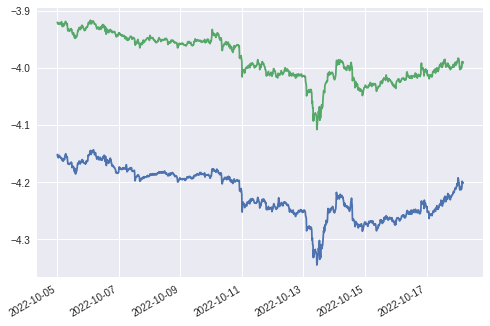

In [33]:
np.log(symbol1).plot()
np.log(symbol2).plot() #example of correlation of two symbols.


In [41]:
# make the necessary imports

import seaborn as sns
import datetime
idx = pd.IndexSlice
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split

In [42]:
data = cl

In [43]:
def find_cointegrated_pairs(data): #here we construct the cointegration function for many pairs.
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

[('BTCUSDT', 'BNBUSDT'), ('NANOUSDT', 'ENJUSDT'), ('NANOUSDT', 'XMRUSDT'), ('NANOUSDT', 'ATOMUSDT'), ('HOTUSDT', 'CELRUSDT'), ('HOTUSDT', 'EOSUSDT'), ('HOTUSDT', 'ZECUSDT'), ('HOTUSDT', 'FTMUSDT'), ('HOTUSDT', 'ETCUSDT'), ('HOTUSDT', 'ADAUSDT'), ('HOTUSDT', 'BCCUSDT'), ('HOTUSDT', 'TFUELUSDT'), ('HOTUSDT', 'ENJUSDT'), ('HOTUSDT', 'TRXUSDT'), ('HOTUSDT', 'ONEUSDT'), ('HOTUSDT', 'WAVESUSDT'), ('HOTUSDT', 'XLMUSDT'), ('HOTUSDT', 'MITHUSDT'), ('HOTUSDT', 'ICXUSDT'), ('HOTUSDT', 'TUSDUSDT'), ('HOTUSDT', 'IOSTUSDT'), ('HOTUSDT', 'XRPUSDT'), ('HOTUSDT', 'BTTUSDT'), ('HOTUSDT', 'XMRUSDT'), ('HOTUSDT', 'BNBUSDT'), ('HOTUSDT', 'LTCUSDT'), ('HOTUSDT', 'ZRXUSDT'), ('HOTUSDT', 'THETAUSDT'), ('HOTUSDT', 'DASHUSDT'), ('HOTUSDT', 'QTUMUSDT'), ('HOTUSDT', 'ONTUSDT'), ('HOTUSDT', 'PAXUSDT'), ('HOTUSDT', 'ZILUSDT'), ('HOTUSDT', 'ATOMUSDT'), ('CELRUSDT', 'XMRUSDT'), ('CELRUSDT', 'PAXUSDT'), ('EOSUSDT', 'ZECUSDT'), ('ZECUSDT', 'ONEUSDT'), ('ZECUSDT', 'PAXUSDT'), ('FTMUSDT', 'ENJUSDT'), ('FTMUSDT', 'XMRUSDT

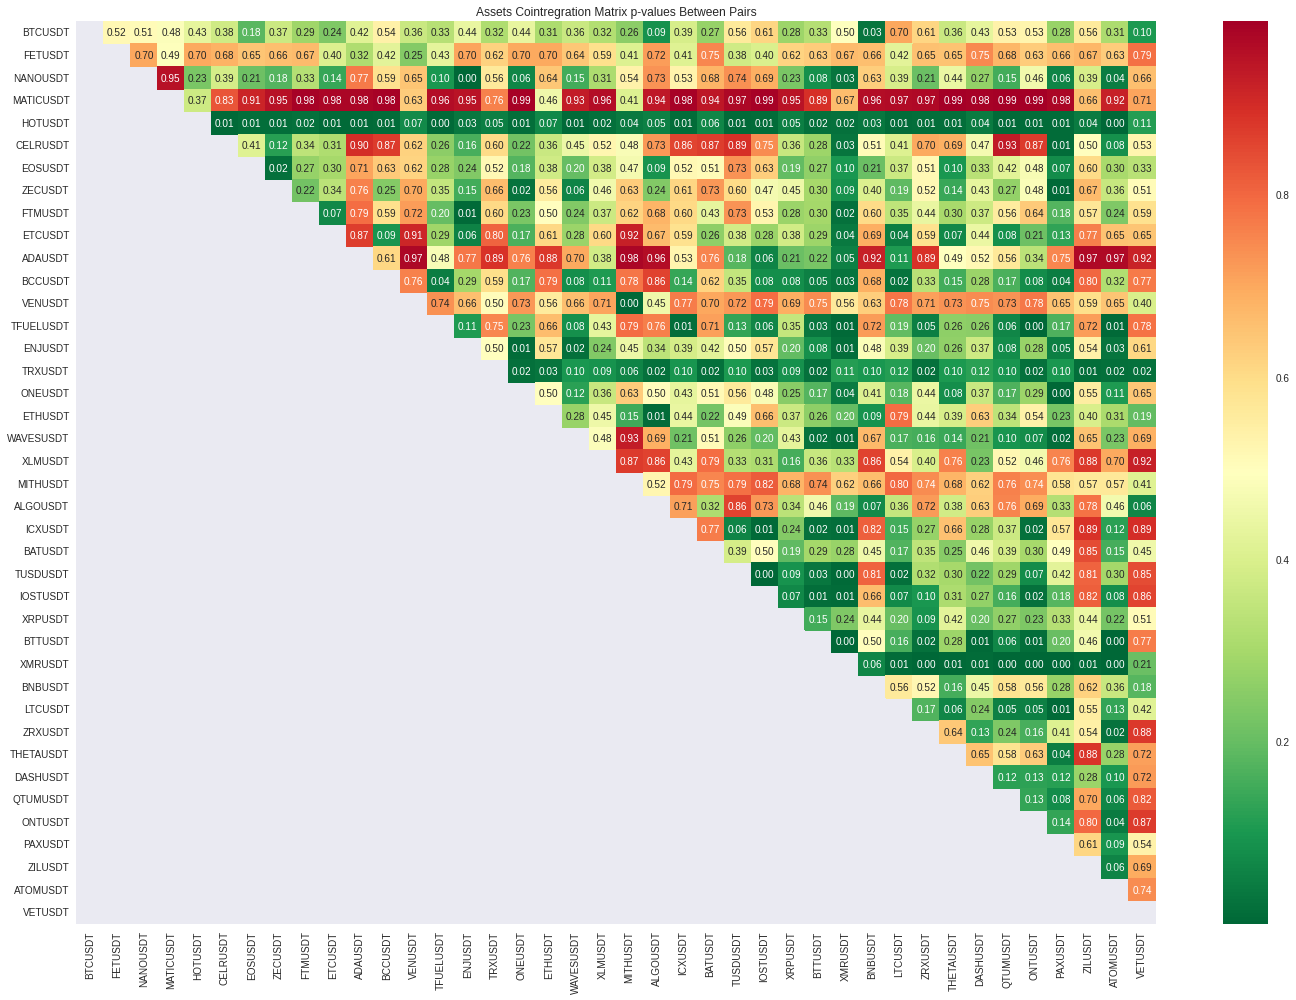

In [46]:
# calculate p-values and plot as a heatmap
pvalues, pairs = find_cointegrated_pairs(data)  
print(pairs)
fig, ax = plt.subplots(figsize=(20,14))
sns.heatmap(pvalues, xticklabels = data.columns,
                yticklabels = data.columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
ax.set_title('Assets Cointregration Matrix p-values Between Pairs')
plt.tight_layout()
#plt.savefig('images/chart2', dpi=300)  plotting the cointegration matrix.